In [422]:
import numpy as np
import pandas as pd
import scipy.sparse as ss

# For TF-IDF vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer

# For stop words
from sklearn.feature_extraction import text 

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.decomposition import TruncatedSVD  # LSA
from sklearn.decomposition import NMF  # NMF

# CorEx
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
from corextopic import vis_topic as vt

# Used for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import csv

In [281]:
# Unpickle the dfs
import pickle

# Dataframe where text has been formatted correctly
# Use for tokenization
with open('cleaned_text_11-14', 'rb') as picklefile: 
    df = pickle.load(picklefile)

# Dataframe where text hasn't been cleaned
# Use for sentiment analysis
with open('precleaned_text_11-14', 'rb') as picklefile: 
    precleaned_df = pickle.load(picklefile)

In [289]:
# Reset the indeces
df.reset_index(drop=True, inplace=True)

precleaned_df.reset_index(drop=True, inplace=True)

In [168]:
df.head(5)

,submission_id,created_time,created_utc,text
0,7ncgte,2018-01-01 01:41:09,1514770869,"versatile, self-deploying, relocatable buildings"
1,7ncnmp,2018-01-01 02:20:00,1514773200,insider. high-tech boxing sensor tracks punche...
2,7ncy6w,2018-01-01 03:23:21,1514777001,cnn viewers couldnt wait for drunk don lemon t...
3,7ncyjm,2018-01-01 03:25:45,1514777145,$50 vr headset! evo vr headset
4,7ndboh,2018-01-01 04:51:10,1514782270,got some apple stuff for christmas? these are ...


In [169]:
df_test = df.text

# Shorten the labels for easier viewing
ex_label = [e[:30]+"..." for e in df_test]

In [170]:
df_test.head(10)

0    versatile, self-deploying, relocatable buildings 
1    insider. high-tech boxing sensor tracks punche...
2    cnn viewers couldnt wait for drunk don lemon t...
3                      $50 vr headset! evo vr headset 
4    got some apple stuff for christmas? these are ...
5    kim jong-un taunts us with nuclear button in n...
6            5 cool gadgets that work on green energy 
7    sonos play 1.  it's designed to be used in the...
8    is it a bad time to get an iphone x since ther...
9    no, well, not yet anyway. i want to use it for...
Name: text, dtype: object

In [171]:
# Add more stop words to the default English stop words
extra_stop_words = ['la', 'en', 'el', 'del', 'para', 'vlez', 'mlaga', 'los', 'que',
                    'las', 'por', 'vlez mlaga', 'una', 'en el', 'nerja', 'specifications',
                   'review', 'price', 'submission', 'features', 'spesifikasi', 'subreddit',
                   'message', 'bot', 'submission', 'post', 'link',
                   'links', 'automatically', 'moderator', '2018',
                   'giveaway', 'reddit']

stop_words = text.ENGLISH_STOP_WORDS.union(extra_stop_words)

In [172]:
vectorizer = TfidfVectorizer(max_df=.9,  # Ignore terms that appear in more than 50% of documents
                             min_df=10,  # Ignore terms that appear in less than 20% of documents
                             ngram_range=(1, 3),  # Make 3-grams
#                              max_features = 20000,  # Only consider the top 20000 words
                             stop_words=stop_words)

# Vectorize documents
doc_word = vectorizer.fit_transform(df_test)  # Returns a sparse matrix
doc_word.shape

(41211, 7194)

In [173]:
# TF-IDF vectorizer visualized
pd.DataFrame(doc_word.toarray(), index=ex_label, columns=vectorizer.get_feature_names()).head(10)

,00,000,000 euros,000 mah,000mah,01,08,09,10,10 000,...,zenfone lite,zenfone max,zenfone max pro,zero,zone,zoom,zte,zte axon,zte nubia,zuckerberg
"versatile, self-deploying, rel...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
insider. high-tech boxing sens...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cnn viewers couldnt wait for d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$50 vr headset! evo vr headset...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
got some apple stuff for chris...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kim jong-un taunts us with nuc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5 cool gadgets that work on gr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sonos play 1. it's designed t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
is it a bad time to get an iph...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"no, well, not yet anyway. i wa...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Latent Semantic Analysis (LSA)

In [131]:
# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
# Signular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
lsa = TruncatedSVD(10)  # Creating 10 topics
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.0027119 , 0.00410764, 0.00387926, 0.00312625, 0.00290091,
       0.00282304, 0.00261514, 0.00254217, 0.0024414 , 0.00240815])

^ Add those two up to get the % explained variance
- Want 70-80% ideally

In [132]:
# Create U matrix, which will show us the terms associated
# with each topic
index = ['component_' + str(i+1) for i in range(10)]

topic_word = pd.DataFrame(lsa.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
topic_word

,00,000,000 euros,000 mah,000mah,01,08,09,10,10 000,...,zenfone lite,zenfone max,zenfone max pro,zero,zone,zoom,zte,zte axon,zte nubia,zuckerberg
component_1,0.002,0.013,0.000,0.001,0.001,0.000,0.001,0.0,0.082,0.003,...,0.000,0.001,0.001,0.006,0.001,0.005,0.004,0.001,0.000,0.001
component_2,-0.001,0.001,0.001,0.001,0.001,0.000,0.001,0.0,0.038,0.000,...,0.000,0.001,0.001,-0.001,-0.000,-0.001,0.001,0.000,0.000,-0.001
component_3,-0.000,0.003,-0.000,-0.000,0.000,-0.000,-0.000,0.0,0.180,0.002,...,-0.000,0.000,0.000,-0.001,-0.000,-0.001,-0.001,-0.000,-0.000,-0.000
component_4,-0.000,0.018,0.000,0.000,0.001,0.000,0.000,0.0,0.240,0.008,...,0.001,0.001,0.001,0.000,0.001,0.002,0.003,0.001,0.000,-0.001
component_5,-0.001,-0.002,-0.000,0.001,0.001,-0.000,-0.000,-0.0,-0.134,-0.002,...,0.000,0.001,-0.000,-0.002,-0.000,0.005,0.003,0.000,0.000,-0.001
component_6,-0.001,0.010,0.000,0.000,0.001,-0.000,0.001,0.0,0.537,0.010,...,-0.000,-0.001,-0.001,-0.001,-0.000,0.000,-0.001,0.000,-0.000,0.000
component_7,-0.000,0.002,0.000,0.000,0.000,-0.000,0.000,0.0,0.056,0.001,...,0.000,-0.000,-0.000,0.001,-0.000,-0.001,0.002,0.000,0.000,-0.000
component_8,0.000,-0.002,0.000,-0.000,-0.001,-0.000,-0.000,-0.0,-0.218,-0.002,...,-0.002,-0.003,-0.002,-0.000,-0.001,0.001,-0.006,-0.002,-0.001,0.000
component_9,0.001,0.005,0.000,0.000,-0.000,-0.000,-0.000,0.0,0.117,0.003,...,0.001,0.002,0.001,-0.002,-0.000,-0.000,0.004,0.001,0.001,-0.000
component_10,-0.000,-0.003,-0.000,0.001,-0.000,0.001,-0.000,0.0,-0.127,-0.003,...,0.004,0.006,0.004,-0.001,0.002,0.003,0.012,0.002,0.003,0.000


In [133]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [31]:
display_topics(lsa, vectorizer.get_feature_names(), 5)


Topic  0
phone, 2018, like, iphone, just

Topic  1
2018, iphone, giveaway, iphone giveaway, 10

Topic  2
samsung, galaxy, samsung galaxy, review, s9

Topic  3
la, en, el, del, mlaga

Topic  4
iphone, apple, giveaway, xs, iphone giveaway

Topic  5
review, iphone, smartphone, smartphone review, price

Topic  6
phone, android, 10, buy, windows

Topic  7
best, buy, gadgets, new, apple

Topic  8
social, automatically, submission, message, 10

Topic  9
10, best, gadgets, windows, buy


In [134]:
columns = ['component_' + str(i+1) for i in range(10)]

Vt = pd.DataFrame(doc_topic.round(5),
             index = df_test,
             columns = columns)
Vt

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
text,,,,,,,,,,
"versatile, self-deploying, relocatable buildings",0.00507,-0.00176,-0.00164,0.00048,-0.00178,0.00004,0.00011,-0.00084,-0.00175,-0.00032
insider. high-tech boxing sensor tracks punches in real time,0.05724,-0.01774,-0.01318,0.00978,-0.02147,-0.00461,-0.00599,-0.01000,-0.01413,-0.00466
cnn viewers couldnt wait for drunk don lemon to do new years eve,0.12785,-0.02668,-0.01372,-0.01517,-0.03772,-0.04522,-0.00220,-0.10315,-0.14374,-0.03599
$50 vr headset! evo vr headset,0.02221,-0.00792,-0.00727,0.00236,-0.00333,0.00608,-0.00103,0.00458,-0.00432,-0.00247
got some apple stuff for christmas? these are the accessories you need,0.12690,-0.02501,0.03111,-0.03683,-0.06051,-0.09366,0.00101,-0.06431,0.12847,-0.09406
kim jong-un taunts us with nuclear button in new years day address,0.07768,-0.00681,-0.00457,0.01192,-0.01298,-0.04422,0.00511,-0.10851,-0.12620,-0.03858
5 cool gadgets that work on green energy,0.05986,-0.00746,-0.00039,0.13245,-0.08939,-0.07429,-0.07871,-0.03799,-0.13985,-0.06087
sonos play 1. it's designed to be used in the bathroom.,0.03774,-0.01396,-0.00751,-0.00370,-0.00645,0.00507,0.00459,-0.00179,0.00147,0.00264
is it a bad time to get an iphone x since there's the spectre and meltdown exploit?,0.08924,0.03919,0.18554,-0.03949,0.00937,-0.04253,-0.00665,0.05307,-0.03079,0.04069


# Non-Negative Matrix Factorization (NMF)

In [135]:
nmf_model = NMF(10)  # Want 10 topics
doc_topic = nmf_model.fit_transform(doc_word)

In [136]:
# Creating W matrix
index = ['component_' + str(i+1) for i in range(10)]

topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
topic_word

,00,000,000 euros,000 mah,000mah,01,08,09,10,10 000,...,zenfone lite,zenfone max,zenfone max pro,zero,zone,zoom,zte,zte axon,zte nubia,zuckerberg
component_1,0.010,0.023,0.000,0.002,0.001,0.001,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.033,0.008,0.020,0.008,0.001,0.001,0.006
component_2,0.000,0.006,0.002,0.002,0.004,0.000,0.005,0.000,0.000,0.000,...,0.001,0.001,0.001,0.004,0.000,0.001,0.003,0.000,0.001,0.000
component_3,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,...,0.000,0.003,0.002,0.000,0.000,0.001,0.000,0.000,0.000,0.000
component_4,0.001,0.049,0.001,0.001,0.001,0.001,0.000,0.000,0.111,0.013,...,0.000,0.000,0.000,0.006,0.002,0.005,0.004,0.000,0.000,0.000
component_5,0.000,0.017,0.000,0.003,0.005,0.000,0.000,0.000,0.000,0.004,...,0.000,0.002,0.000,0.000,0.000,0.018,0.009,0.002,0.001,0.000
component_6,0.000,0.054,0.001,0.001,0.005,0.000,0.004,0.002,2.266,0.043,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000
component_8,0.001,0.013,0.000,0.000,0.003,0.001,0.000,0.000,0.000,0.000,...,0.004,0.010,0.008,0.014,0.002,0.004,0.016,0.003,0.002,0.000
component_9,0.005,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.001,0.000,0.000
component_10,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005


In [137]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
just, don, know, use, people, good, think, really, want, need

Topic  1
samsung, galaxy, samsung galaxy, s9, galaxy s9, samsung galaxy s9, note, galaxy note, smartphone, samsung galaxy note

Topic  2
iphone, xs, iphone xs, huge iphone, huge, xs max, max, xr, plus, apple iphone

Topic  3
best, gadgets, buy, online, cool, amp, smart, india, smartphone, buy online

Topic  4
phone, android, phones, camera, screen, mobile, battery, android phone, foldable, nokia

Topic  5
10, windows, 10 iphone, huge 10 iphone, huge 10, 10 iphone february, february open, iphone february, iphone february open, february

Topic  6
social, media, social media, reddit, removed, questions, moderators, social networking, personal information, personal

Topic  7
new, smartphone, pro, xiaomi, nokia, huawei, ipad, camera, new iphone, mi

Topic  8
apple, watch, apple watch, ipad, pro, macbook, apple iphone, android, homepod, products

Topic  9
like, looks, looks like, look, sounds, feel like, feel, sounds li

In [138]:
columns = ['component_' + str(i+1) for i in range(10)]

# Creating H matrix
H = pd.DataFrame(doc_topic.round(5),
             index = ex_label,
             columns = columns)
H

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
"versatile, self-deploying, rel...",0.00107,0.00000,0.00000,0.00022,0.00000,0.00000,0.00009,0.00087,0.00000,0.00013
insider. high-tech boxing sens...,0.01290,0.00000,0.00000,0.00405,0.00000,0.00000,0.00000,0.00454,0.00000,0.00036
cnn viewers couldnt wait for d...,0.01825,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.08994,0.00000,0.00000
$50 vr headset! evo vr headset...,0.00532,0.00000,0.00000,0.00091,0.00034,0.00010,0.00000,0.00093,0.00000,0.00031
got some apple stuff for chris...,0.01438,0.00000,0.00015,0.00297,0.00000,0.00000,0.00000,0.00000,0.08344,0.00000
kim jong-un taunts us with nuc...,0.00560,0.00000,0.00000,0.00000,0.00000,0.00028,0.00000,0.07409,0.00000,0.00000
5 cool gadgets that work on gr...,0.00578,0.00000,0.00000,0.04725,0.00000,0.00000,0.00000,0.00000,0.00000,0.00056
sonos play 1. it's designed t...,0.00932,0.00000,0.00009,0.00000,0.00048,0.00000,0.00000,0.00038,0.00107,0.00011
is it a bad time to get an iph...,0.00930,0.00000,0.06762,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"no, well, not yet anyway. i wa...",0.02944,0.00000,0.00000,0.00000,0.00140,0.00149,0.00000,0.00055,0.00000,0.00000


# Latent Dirichlet Allocation (LDA)
- This is a __probabilitic method__, vs. LSA and NMF which are __matrix factorization methods__.

# CorEx

In [195]:
# List of all the words (features)
words = list(np.asarray(vectorizer.get_feature_names()))

In [196]:
# n_hidden is the number of topics
# words is your list of words used in your corpus
# I recommend adding docs=df.data to make it easier 
# to check which sentences are in each resulting topic
topic_model = ct.Corex(n_hidden=3, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=df_test)

In [248]:
topic_model = ct.Corex(n_hidden=2,  # Number of topics to construct
                       words=words,  # All the words in our documents
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_word, words=words, docs=df_test, 
                anchors=[['apple', 'iphone', 'ipad', 'ios', 'mac', 'macbook', 'siri', 'airpods', 'xs', 'ipod'], 
                         ['samsung', 'galaxy', 'bixby']],
                         anchor_strength=10)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics(n_words=20)  # Print the n words for each category
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: iphone,apple,ipad,xs,ios,macbook,mac,airpods,siri,ipod,iphone xs,apple watch,10 iphone,huge 10,huge 10 iphone,huge,macbook pro,huge iphone,xs max,iphone february open
1: samsung,galaxy,bixby,samsung galaxy,galaxy s9,s9,samsung galaxy s9,galaxy note,galaxy s10,samsung galaxy note,s10,note,samsung galaxy s10,galaxy tab,sort new,galaxy s8,new samsung,foldable,galaxy s9 s9,s9 s9


In [249]:
list(enumerate(topics))

[(0,
  [('iphone', 0.03203049313967685),
   ('apple', 0.03190395370970909),
   ('ipad', 0.007559215013362059),
   ('xs', 0.006268244197876606),
   ('ios', 0.005851426773708752),
   ('macbook', 0.005616342934904315),
   ('mac', 0.003423245759073947),
   ('airpods', 0.0030159125666019953),
   ('siri', 0.001382592722745822),
   ('ipod', 0.0010878726473230191),
   ('iphone xs', 0.0042657919319643404),
   ('apple watch', 0.0036051316684183776),
   ('10 iphone', 0.002773069829950963),
   ('huge 10', 0.0027203460496351096),
   ('huge 10 iphone', 0.0027203460496351096),
   ('huge', 0.0027045919769007483),
   ('macbook pro', 0.0026761491642023206),
   ('huge iphone', 0.0026644556060366037),
   ('xs max', 0.002604761655463677),
   ('iphone february open', 0.0025781310531031104)]),
 (1,
  [('samsung', 0.03279042498641041),
   ('galaxy', 0.023833677678493554),
   ('bixby', 0.0016494811293817316),
   ('samsung galaxy', 0.0162277180670188),
   ('galaxy s9', 0.007989922714926214),
   ('s9', 0.0071759

In [253]:
# Print top documents in topic 0
topic_model.get_top_docs(topic=0, n_docs=10)

[('alternative title:  "iphone xs users report phone functioning as intended."  when has this _not_ been an issue?  i like apple\'s software but honestly their hardware quality hasn\'t been of the best. at least the new iphones are fairly rigid... nevermind the price tag of replacing the back may it break...',
  0.0),
 ('cool iphone xs/max wallpapers collection ', 0.0),
 ('apple: robot portrait of the macbook air of our dreams .... less than 1000 dollars ',
  0.0),
 ("its basically an ipad non-pro with more flexibility but not much extra power. if you go in with ipad-like expectations you will be fine. if you go in with full windows laptop expectations you're gonna have a bad time.",
  0.0),
 ('iphone x 2018: apple could reduce the size of the notch ', 0.0),
 ('thats crazy. if they did that with ios apple would revoke all there certain pretty quick so itll be interesting to see what google do. ',
  0.0),
 ('apple wins $533.3 million from samsung in latest iphone patent retrial ',
  0.0

In [200]:
vt.vis_rep(topic_model, column_label=words, prefix='topic-model-example')

Print topics in text file


In [263]:
# Get the topic predictions for every document
predictions_df = pd.DataFrame(topic_model.predict(doc_word), columns=['apple', 'samsung'])

In [264]:
df.shape

(41211, 4)

In [266]:
predictions_df.shape

(41211, 2)

In [286]:
precleaned_df.head()

,submission_id,created_time,created_utc,post
0,7ncgte,2018-01-01 01:41:09,1514770869,"Versatile, self-deploying, relocatable buildings"
3,7ncnmp,2018-01-01 02:20:00,1514773200,INSIDER. High-Tech Boxing Sensor Tracks Punche...
4,7ncy6w,2018-01-01 03:23:21,1514777001,CNN Viewers Couldn’t Wait For Drunk Don Lemon ...
7,7ncyjm,2018-01-01 03:25:45,1514777145,$50 VR Headset! EVO VR Headset
9,7ndboh,2018-01-01 04:51:10,1514782270,Got some Apple stuff for Christmas? These are ...


In [330]:
# Combine documents with their respective topics
topics_df = pd.concat([precleaned_df, predictions_df], axis=1)

In [331]:
topics_df.head(5)

,submission_id,created_time,created_utc,post,apple,samsung
0,7ncgte,2018-01-01 01:41:09,1514770869,"Versatile, self-deploying, relocatable buildings",False,False
1,7ncnmp,2018-01-01 02:20:00,1514773200,INSIDER. High-Tech Boxing Sensor Tracks Punche...,False,False
2,7ncy6w,2018-01-01 03:23:21,1514777001,CNN Viewers Couldn’t Wait For Drunk Don Lemon ...,False,False
3,7ncyjm,2018-01-01 03:25:45,1514777145,$50 VR Headset! EVO VR Headset,False,False
4,7ndboh,2018-01-01 04:51:10,1514782270,Got some Apple stuff for Christmas? These are ...,True,False


In [336]:
# Contains only documents that have apple as their topic
apple_df = topics_df[topics_df.apple == True]
apple_df.reset_index(drop=True, inplace=True)

# Contains only documents that have samsung as their topic
samsung_df = topics_df[topics_df.samsung == True]
samsung_df.reset_index(drop=True, inplace=True)


In [338]:
apple_df.shape

(3758, 6)

In [337]:
samsung_df.shape

(1586, 6)

# Sentiment Analysis

## All of 2018

In [316]:
# Call sentiment analyzer object
analyser = SentimentIntensityAnalyzer()

In [358]:
# Get the compound sentiment analysis score for input text
def get_compound_score(text):
    return analyser.polarity_scores(text)['compound']

In [353]:
analyser.polarity_scores('you suck')

{'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'compound': -0.4404}

In [342]:
apple_df.post.iloc[3751]

'XS Max will soon be banned like Note 8 '

In [359]:
# Create compound sentiment score columns
apple_df['sentiment_score'] = apple_df.post.apply(get_compound_score)

samsung_df['sentiment_score'] = samsung_df.post.apply(get_compound_score)

/Users/samad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/samad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [386]:
apple_df.head()

,submission_id,created_time,created_utc,post,apple,samsung,sentiment_score
0,7ndboh,2018-01-01 04:51:10,1514782270,Got some Apple stuff for Christmas? These are ...,True,False,0.0000
1,7ndw82,2018-01-01 07:09:19,1514790559,Is it a bad time to get an iPhone X since ther...,True,False,-0.5994
2,7ndw82,2018-01-01 07:09:19,1514790559,a question of budget and liking the new iPhone...,True,False,0.6808
3,7ndw82,2018-01-01 07:09:19,1514790559,iPhone 8 vs iPhone X?\n\nNeed to upgrade my iP...,True,False,0.2589
4,7ndw82,2018-01-01 07:09:19,1514790559,Pretty sure the new ones just came put but if ...,True,False,0.9042


In [448]:
def dftest(time, timeseries, time2, timeseries2):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()  # Moving average smoothing (preprocessing)
    rolmean2 = timeseries2.rolling(window=12).mean()  # Moving average smoothing (preprocessing)

    #Plot rolling statistics:
    plt.figure(figsize=(15, 5))
    #orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(time, rolmean, color='blue', label='Samsung')
    mean2= plt.plot(time2, rolmean2, color='red', label='Apple')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('2018 Sentiment Score Rolling Mean')
    #plt.xticks(time, ['January', 'February'])
    plt.xticks(np.arange(min(time), max(time)+1, (min(time)-max(time))/12),
              ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December'])
    plt.show(block=False)
    

In [426]:
apple_df.to_csv('apple.csv')

In [424]:
samsung_df.to_csv('samsung.csv')

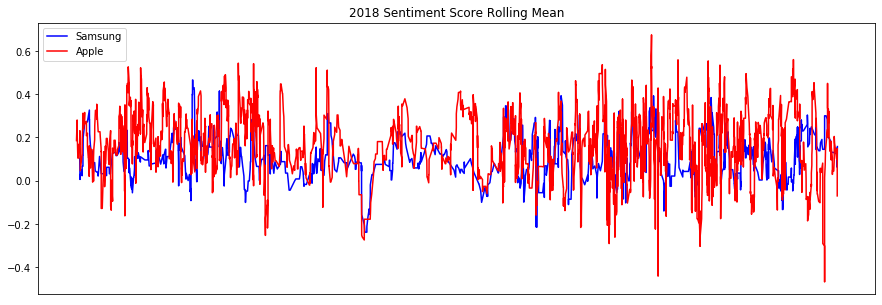

In [449]:
dftest(samsung_df.created_utc, samsung_df.sentiment_score, apple_df.created_utc, apple_df.sentiment_score)

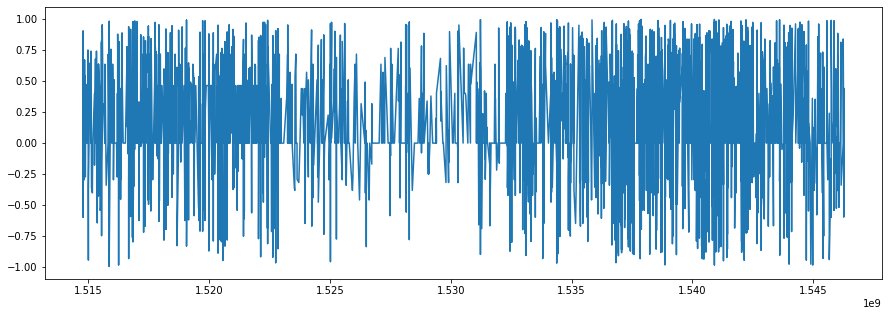

In [391]:
plt.figure(figsize=(15, 5))

plt.plot(apple_df.created_utc, apple_df.sentiment_score)

In [376]:
# Sentiment scores for year 2018 - Samsung
num_pos_samsung = len(samsung_df[samsung_df.sentiment_score > 0])

num_neu_samsung = len(samsung_df[samsung_df.sentiment_score == 0])

num_neg_samsung = len(samsung_df[samsung_df.sentiment_score < 0])

In [377]:
print(num_pos_samsung, num_neu_samsung, num_neg_samsung)

531 821 234


In [374]:
# Sentiment scores for year 2018 - Apple
num_pos_apple = len(apple_df[apple_df.sentiment_score > 0])

num_neu_apple = len(apple_df[apple_df.sentiment_score == 0])

num_neg_apple = len(apple_df[apple_df.sentiment_score < 0])

In [375]:
print(num_pos_apple, num_neu_apple, num_neg_apple)

1834 1103 821


In [461]:
def plot(time, timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=2).mean()  # Moving average smoothing (preprocessing)

    #Plot rolling statistics:
    plt.figure(figsize=(15, 5))
    #orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(time, rolmean, color='red', label='Apple')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('2018 Sentiment Score Rolling Mean')
    #plt.xticks(time, ['January', 'February'])
    plt.xticks(np.arange(min(time), max(time)+1, (min(time)-max(time))/12),
              ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December'])
    plt.show(block=False)

In [477]:
def get_sentiment_scores(df):
    num_pos = len(df[df.sentiment_score > 0])
    num_neu = len(df[df.sentiment_score == 0])
    num_neg = len(df[df.sentiment_score < 0])
    
    pos_pct = num_pos / (num_pos + num_neu + num_neg)
    neu_pct = num_neu / (num_pos + num_neu + num_neg)
    neg_pct = num_neg / (num_pos + num_neu + num_neg)
    
    print('pos: {}\nneu: {}\nneg: {}'.format(num_pos, num_neu, num_neg))
    print('pos%: {}\nneu%: {}\nneg%: {}'.format(pos_pct, neu_pct, neg_pct))

## Apple Product Sentiment Scores

In [454]:
# Sentiment score for week of February 9 (HomePod release)
homepod_df = apple_df[apple_df.created_utc > 1518134400][apple_df.created_utc < 1518739200]

/Users/samad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [478]:
get_sentiment_scores(homepod_df)

pos: 38
neu: 12
neg: 17
pos%: 0.5671641791044776
neu%: 0.1791044776119403
neg%: 0.2537313432835821


In [481]:
# Sentiment score for week of March 27 (New iPad release)
ipad_df = apple_df[apple_df.created_utc > 1522108800][apple_df.created_utc < 1522713600]

get_sentiment_scores(ipad_df)

pos: 70
neu: 28
neg: 24
pos%: 0.5737704918032787
neu%: 0.22950819672131148
neg%: 0.19672131147540983


/Users/samad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [482]:
# Sentiment score for week of July 12 (New MBP release)
mbp_df = apple_df[apple_df.created_utc > 1531353600][apple_df.created_utc < 1531958400]

get_sentiment_scores(mbp_df)

pos: 7
neu: 20
neg: 5
pos%: 0.21875
neu%: 0.625
neg%: 0.15625


/Users/samad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [483]:
# Sentiment score for week of Sept 12 (New iPhones and Apple Watch release)
iphone_df = apple_df[apple_df.created_utc > 1536710400][apple_df.created_utc < 1537315200]

get_sentiment_scores(iphone_df)

pos: 100
neu: 92
neg: 68
pos%: 0.38461538461538464
neu%: 0.35384615384615387
neg%: 0.26153846153846155


/Users/samad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [484]:
# Sentiment score for week of Oct 30 (New iPad Pro release)
ipad_pro_df = apple_df[apple_df.created_utc > 1540857600][apple_df.created_utc < 1541462400]

get_sentiment_scores(ipad_pro_df)

pos: 122
neu: 75
neg: 67
pos%: 0.4621212121212121
neu%: 0.2840909090909091
neg%: 0.2537878787878788


/Users/samad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## Samsung Product Sentiment Scores

In [485]:
# Sentiment score for week of Feb 25 (S9/+ release)
s9_df = samsung_df[samsung_df.created_utc > 1519516800][samsung_df.created_utc < 1520121600]

get_sentiment_scores(s9_df)

pos: 31
neu: 34
neg: 11
pos%: 0.40789473684210525
neu%: 0.4473684210526316
neg%: 0.14473684210526316


/Users/samad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [486]:
# Sentiment score for week of May 23 (A6/+, J4/6/8 Release)
a6_df = samsung_df[samsung_df.created_utc > 1527033600][samsung_df.created_utc < 1527638400]

get_sentiment_scores(a6_df)



pos: 2
neu: 8
neg: 1
pos%: 0.18181818181818182
neu%: 0.7272727272727273
neg%: 0.09090909090909091


/Users/samad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [487]:
# Sentiment score for week of June 23 (J3/7 Release)
j3_df = samsung_df[samsung_df.created_utc > 1529712000][samsung_df.created_utc < 1530316800]

get_sentiment_scores(j3_df)



pos: 4
neu: 6
neg: 3
pos%: 0.3076923076923077
neu%: 0.46153846153846156
neg%: 0.23076923076923078


/Users/samad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [489]:
# Sentiment score for week of Aug 1 (Tab S4 Release)
tabs4_df = samsung_df[samsung_df.created_utc > 1533081600][samsung_df.created_utc < 1533686400]

get_sentiment_scores(tabs4_df)



pos: 14
neu: 26
neg: 5
pos%: 0.3111111111111111
neu%: 0.5777777777777777
neg%: 0.1111111111111111


/Users/samad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [490]:
# Sentiment score for week of Aug 9 (Note 9, Galaxy Watch, Galaxy Home Release)
note9_df = samsung_df[samsung_df.created_utc > 1533772800][samsung_df.created_utc < 1534377600]

get_sentiment_scores(note9_df)



pos: 21
neu: 42
neg: 14
pos%: 0.2727272727272727
neu%: 0.5454545454545454
neg%: 0.18181818181818182


/Users/samad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
